## Email Marketing Effectiveness Prediction

Aim : to predict how effective the email marketing is.

In [1]:
import pandas as pd # import pandas library for loading and describing dataset

In [2]:
df = pd.read_csv('email_marketing_data.csv') # loading dataset

In [3]:
df.head() # viewing first 5 rows of the data

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,Promotional,2.2,Website,East,Campaign_2,33.0,Morning,440,8.0,0.0,Not_Opened
1,EMA00081000066290,Transactional,0.1,App,Bay,Campaign_3,36.0,Afternoon,962,5.0,0.0,Opened
2,EMA00081000076560,Promotional,3.0,Website,East,Campaign_2,25.0,Afternoon,610,16.0,0.0,Not_Opened
3,EMA00081000109720,Promotional,0.0,Website,Central,Campaign_3,18.0,Afternoon,947,4.0,0.0,Not_Opened
4,EMA00081000160500,Promotional,3.2,App,East,Campaign_2,34.0,Evening,116,4.0,0.0,Not_Opened


In [4]:
df.shape

(48291, 12)

In [5]:
df.shape[0]

48291

In [6]:
df.shape[1]

12

In [7]:
df.info # overview of data

<bound method DataFrame.info of                 Email_ID     Email_Type  Subject_Hotness_Score  \
0      EMA00081000034500    Promotional                    2.2   
1      EMA00081000066290  Transactional                    0.1   
2      EMA00081000076560    Promotional                    3.0   
3      EMA00081000109720    Promotional                    0.0   
4      EMA00081000160500    Promotional                    3.2   
...                  ...            ...                    ...   
48286  EMA00089992519500    Promotional                    1.2   
48287  EMA00089995974500  Transactional                    0.4   
48288  EMA00089998225300    Promotional                    1.3   
48289  EMA00089999168800    Promotional                    0.4   
48290  EMA00089999316900    Promotional                    1.5   

      Email_Source_Type Customer_Location Email_Campaign_Type  \
0               Website              East          Campaign_2   
1                   App               Bay    

##### Data Preprocessing

In [8]:
df.isnull().sum() # checking null records

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [9]:
# there are no null records

##### Encoding

In [10]:
# One Hot Encoding of Categorical Data
df = pd.get_dummies(data=df,columns=['Time_Email_sent_Category']) # encoding all categorical data

In [11]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Evening,Time_Email_sent_Category_Morning
0,EMA00081000034500,Promotional,2.2,Website,East,Campaign_2,33.0,440,8.0,0.0,Not_Opened,False,False,True
1,EMA00081000066290,Transactional,0.1,App,Bay,Campaign_3,36.0,962,5.0,0.0,Opened,True,False,False
2,EMA00081000076560,Promotional,3.0,Website,East,Campaign_2,25.0,610,16.0,0.0,Not_Opened,True,False,False
3,EMA00081000109720,Promotional,0.0,Website,Central,Campaign_3,18.0,947,4.0,0.0,Not_Opened,True,False,False
4,EMA00081000160500,Promotional,3.2,App,East,Campaign_2,34.0,116,4.0,0.0,Not_Opened,False,True,False


In [14]:
# Label Encoding for Target Column
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder = LabelEncoder() 

In [16]:
df['Email_Status'] = labelencoder.fit_transform(df['Email_Status']) # encoding email_status to numerical data for visualization

In [17]:
df['Email_Status'] # view the numerical Email_Status

0        1
1        2
2        1
3        1
4        1
        ..
48286    2
48287    1
48288    1
48289    1
48290    1
Name: Email_Status, Length: 48291, dtype: int64

In [18]:
df.head(120)
# 0 = clicked
# 1 = not_opened
# 2 = opened

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Evening,Time_Email_sent_Category_Morning
0,EMA00081000034500,Promotional,2.2,Website,East,Campaign_2,33.0,440,8.0,0.0,1,False,False,True
1,EMA00081000066290,Transactional,0.1,App,Bay,Campaign_3,36.0,962,5.0,0.0,2,True,False,False
2,EMA00081000076560,Promotional,3.0,Website,East,Campaign_2,25.0,610,16.0,0.0,1,True,False,False
3,EMA00081000109720,Promotional,0.0,Website,Central,Campaign_3,18.0,947,4.0,0.0,1,True,False,False
4,EMA00081000160500,Promotional,3.2,App,East,Campaign_2,34.0,116,4.0,0.0,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,EMA00081016265850,Promotional,1.3,Website,Bay,Campaign_2,25.0,636,24.0,13.0,1,True,False,False
116,EMA00081016354000,Transactional,1.0,App,Bay,Campaign_2,39.0,934,11.0,7.0,1,True,False,False
117,EMA00081016359350,Promotional,0.6,Website,Forest,Campaign_2,45.0,610,14.0,10.0,2,False,True,False
118,EMA00081016365090,Promotional,1.6,App,Downtown,Campaign_2,20.0,1140,26.0,20.0,0,True,False,False


##### Data Visualization

In [20]:
import seaborn as sns # importing seaborn to visualize the data

<Axes: xlabel='Email_Status', ylabel='Subject_Hotness_Score'>

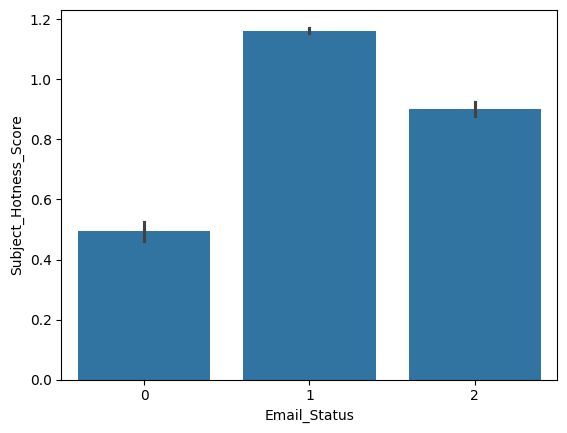

In [21]:
sns.barplot(x='Email_Status',y='Subject_Hotness_Score',data=df)

<Axes: xlabel='Email_Status', ylabel='Total_Past_Communications'>

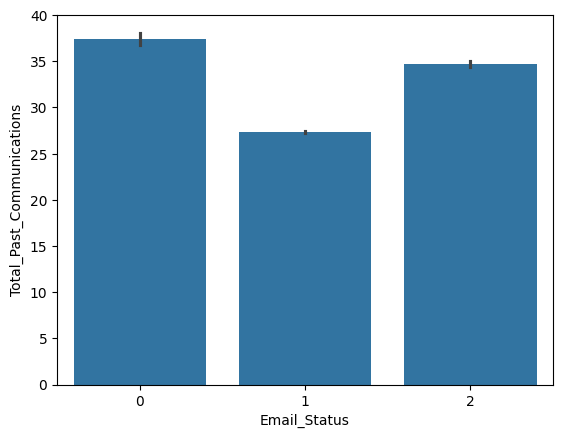

In [22]:
sns.barplot(x='Email_Status',y='Total_Past_Communications',data=df)

In [23]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status',
       'Time_Email_sent_Category_Afternoon',
       'Time_Email_sent_Category_Evening', 'Time_Email_sent_Category_Morning'],
      dtype='object')

##### Divide X and y

In [24]:
X = df[['Subject_Hotness_Score','Total_Past_Communications','Time_Email_sent_Category_Afternoon','Time_Email_sent_Category_Evening','Time_Email_sent_Category_Morning']]
y = df['Email_Status'] # assigning target column to y

In [25]:
X

,Subject_Hotness_Score,Total_Past_Communications,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Evening,Time_Email_sent_Category_Morning
0,2.2,33.0,False,False,True
1,0.1,36.0,True,False,False
2,3.0,25.0,True,False,False
3,0.0,18.0,True,False,False
4,3.2,34.0,False,True,False
...,...,...,...,...,...
48286,1.2,30.0,False,True,False
48287,0.4,22.0,False,True,False
48288,1.3,40.0,True,False,False
48289,0.4,50.0,False,False,True


In [26]:
y

0        1
1        2
2        1
3        1
4        1
        ..
48286    2
48287    1
48288    1
48289    1
48290    1
Name: Email_Status, Length: 48291, dtype: int64

##### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # standardizes the features in X

In [29]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Evening,Time_Email_sent_Category_Morning
0,EMA00081000034500,Promotional,2.2,Website,East,Campaign_2,33.0,440,8.0,0.0,1,False,False,True
1,EMA00081000066290,Transactional,0.1,App,Bay,Campaign_3,36.0,962,5.0,0.0,2,True,False,False
2,EMA00081000076560,Promotional,3.0,Website,East,Campaign_2,25.0,610,16.0,0.0,1,True,False,False
3,EMA00081000109720,Promotional,0.0,Website,Central,Campaign_3,18.0,947,4.0,0.0,1,True,False,False
4,EMA00081000160500,Promotional,3.2,App,East,Campaign_2,34.0,116,4.0,0.0,1,False,True,False


##### Splitting training and testing data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state=42)

### Logistic Regression

In [32]:
# training logistic regression

from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression() # creating instance of LogisticRegression

In [34]:
model.fit(X_train,y_train) # training the model using training data

LogisticRegression()

##### Model Evaulation

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_train,model.predict(X_train)) # accuracy of training

0.8019406561547792

In [38]:
prediction = model.predict(X_test) # making predictions using the testing data

In [39]:
accuracy_score(y_test,prediction) # calculating accuracy of prediction

0.8045969077857538

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,prediction)

array([[    0,   485,     2],
       [    0, 11651,     3],
       [    0,  2341,     6]])

In [42]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Evening,Time_Email_sent_Category_Morning
0,EMA00081000034500,Promotional,2.2,Website,East,Campaign_2,33.0,440,8.0,0.0,1,False,False,True
1,EMA00081000066290,Transactional,0.1,App,Bay,Campaign_3,36.0,962,5.0,0.0,2,True,False,False
2,EMA00081000076560,Promotional,3.0,Website,East,Campaign_2,25.0,610,16.0,0.0,1,True,False,False
3,EMA00081000109720,Promotional,0.0,Website,Central,Campaign_3,18.0,947,4.0,0.0,1,True,False,False
4,EMA00081000160500,Promotional,3.2,App,East,Campaign_2,34.0,116,4.0,0.0,1,False,True,False


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier # importing RandomClassifier class

In [44]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42) # creating instance of the class

In [45]:
rfc.fit(X_train,y_train) # training the model

RandomForestClassifier(random_state=42)

##### Model Evaulation

In [46]:
accuracy_score(y_train,rfc.predict(X_train)) # accuracy of training

0.8218797148182114

In [47]:
prediction_rfc = rfc.predict(X_test) #making the predictions

In [48]:
accuracy_score(y_test,prediction_rfc) #calculating accuracy of prediction

0.7961761457758144

In [49]:
confusion_matrix(y_test,prediction_rfc)

array([[    4,   398,    85],
       [   21, 11245,   388],
       [    4,  2057,   286]])

### K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier # importing KNeighborsClassifier class

In [51]:
knn = KNeighborsClassifier(n_neighbors=5) # creating instance of KNeighborsClassifier

In [52]:
knn.fit(X_train,y_train) # training the model

KNeighborsClassifier()

##### Model Evaluation

In [53]:
accuracy_score(y_train,knn.predict(X_train)) # accuracy of training

0.7948406946129042

In [54]:
prediction_knn = knn.predict(X_test) # making predictions

In [55]:
accuracy_score(y_test,prediction_knn) # calculating accuracy of prediciton

0.7795416896742131

In [56]:
confusion_matrix(y_test,prediction_knn)

array([[   32,   366,    89],
       [   67, 10914,   673],
       [   71,  1928,   348]])

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier class

In [58]:
dt = DecisionTreeClassifier() # creating instance of DecisionTreeClassifier

In [59]:
dt.fit(X_train,y_train) # training the model

DecisionTreeClassifier()

##### Model Evaluation

In [60]:
accuracy_score(y_train,dt.predict(X_train)) # accuracy of training

0.8218797148182114

In [61]:
prediction_dt = dt.predict(X_test) # making predictions

In [62]:
accuracy_score(y_test,prediction_dt) # calculating accuracy of prediction

0.7982468249585865

In [63]:
confusion_matrix(y_test,prediction_dt)

array([[    8,   403,    76],
       [   39, 11298,   317],
       [   17,  2071,   259]])